# Prova 1:Exercicio 3

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab

Planta do sistema: 
$y = \frac{3 \cdot s + 2}{s^2 + a_1\cdot s + a_0} \cdot u$


In [66]:
# Parametros
a1 = 2
a0 = 1

In [67]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')

a1=3
ft = (3 * s + 2) / (s**2 + a1 * s + a0)
lb = s**2 + 2*s + 1
ftx0 = -(s**2 / lb) * ft + (3 * s) / lb + 2 / lb
ftx1 = (s / lb) * ft
ftx2 = (1 / lb) * ft

ftx_z = ftx0 - ftx1 
ft_phi1 = ftx1 
ft_phi2 = ftx2

ftx_z

TransferFunction(array([   6,   61,  269,  682, 1105, 1198,  881,  434,  137,   25,    2]), array([   1,   14,   87,  318,  763, 1268, 1498, 1268,  763,  318,   87,
         14,    1]))

In [68]:
# Parâmetros de simulação
N = 100
dt = 0.01  # Taxa de amostragem
T = np.arange(0, N + dt, dt)
u = 10*np.cos(2*T + (np.pi/7)) + 0.9*np.sin(3*T) # entrada
len(T)

10001

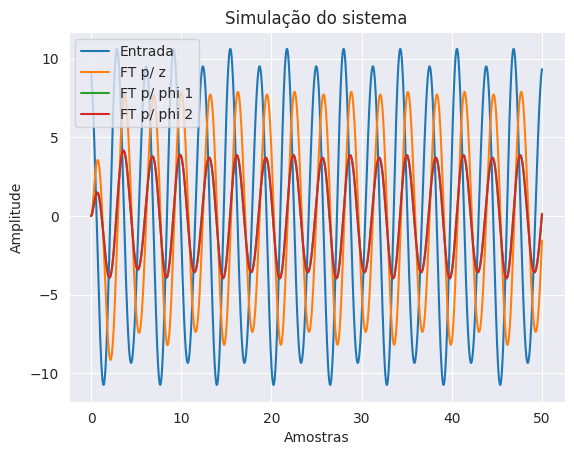

In [69]:
# Simulação dos modelos
z, T, _  = matlab.lsim(ftx_z, u, T)
phi1, T, _ = matlab.lsim(ft_phi1, u, T)
phi2, T, _ = matlab.lsim(ft_phi2, u, T)


# Plotagem dos resultados juntos
corte = int(np.ceil(0.5*len(T)))
plt.plot(T[:corte], u[:corte], label='Entrada')
plt.plot(T[:corte], z[:corte], label='FT p/ z')
plt.plot(T[:corte], phi1[:corte], label='FT p/ phi 1')
plt.plot(T[:corte], phi1[:corte], label='FT p/ phi 2')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Simulação do sistema')

plt.legend()
plt.show()

In [70]:
theta = np.zeros((2, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
theta[:, 0] = [0, 0]
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros

gama = np.array([[2, 0], [0, 2]])  # Matriz de ajuste

In [71]:
# Loop de iterações para o algoritmo adaptativo
for k in range(0, int(N/dt)): 
    # Construção do vetor phi
    phi = np.array([[phi1[k]], [phi2[k]]])
    
    # Cálculo de ms (fator de ajuste)
    ms = 1 + 0.1 * np.dot(phi.T, phi)[0, 0]

    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k+1] = (z[k] - np.dot(theta[:, k].T, phi))[0] / ms
    delta_theta = (dt * np.dot(gama, erro[k+1] * phi) / ms).reshape((2,))
    theta[:, k+1] = theta[:, k] + delta_theta

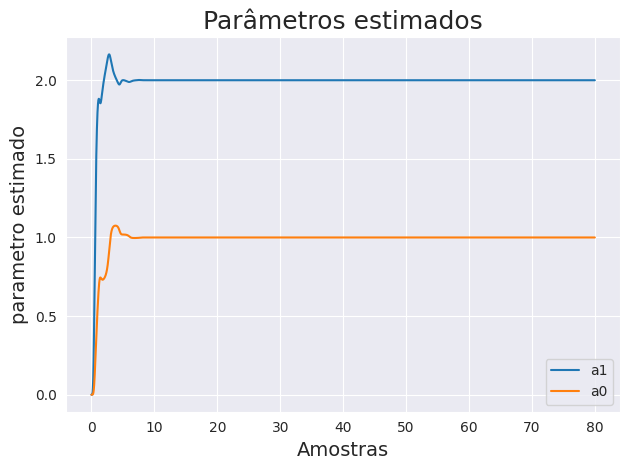

In [72]:
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots

corte = int(np.ceil(0.8*len(theta[0])))

fontesize = 14
titlesize = 18
# Primeiro subplot (Gráfico dos parâmetros estimados)
plt.plot(T[:corte], theta[0, :][:corte], label='a1')
plt.plot(T[:corte], theta[1, :][:corte], label='a0')
plt.legend()
plt.title('Parâmetros estimados', fontsize=titlesize)
plt.xlabel('Amostras', fontsize=fontesize)
plt.ylabel('parametro estimado', fontsize=fontesize)

# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()

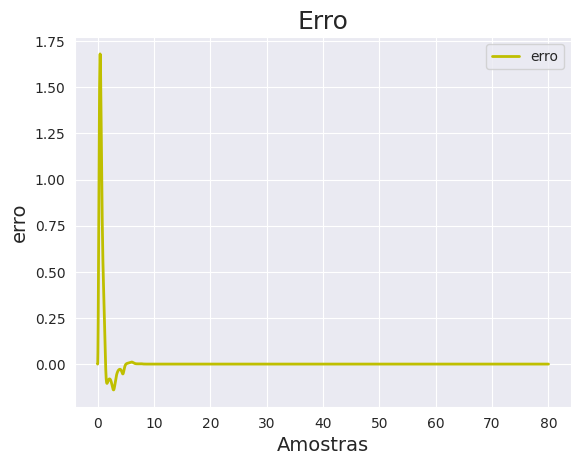

In [73]:
# Segundo subplot (Gráfico do erro)
plt.plot(T[:corte], erro[:corte], 'y', linewidth=2, label='erro')
plt.xlabel('Amostras', fontsize=fontesize)
plt.ylabel('erro', fontsize=fontesize)
plt.title('Erro', fontsize=titlesize)
plt.legend()
plt.grid(True)

# Exiba o gráfico
plt.show()  